# Banana Index 2.0

I was browsing through my university projects and one I always enjoyed was Banana Index EDA. But looking at it now I thought about how I would do many things differently now and add or test some other things.

So this will be it, not sure if it will be different enoght to warrant it's own project, but I really wanna do it.


The list of things I noted that I wanted to change or add:


*   Box plots for outliers
*   Clustering with limited columns/properties
*   Keep all data it the frame instead of limiting to few columns ✅
*   Correlation matrix with all columns ✅
*   Better distributions plots: by type of product, by multiple properties, etc.
*   3 sigma rule - see if there is ready implementation, split calculations with plotting
*   Normalization - do a research whether it should be done first, keep re-calculation values
*   Set/check types in frame, set index to name, other dataframe utilities ✅
*   Try different clustering other than hierarchical (see lecture notes!)
*   Try different classifiers (search for folds)
*   More EDA stuff: better plots, statistics etc.
*   More if something comes up


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Dataset download

In [3]:
dataset_url = 'https://raw.githubusercontent.com/TheEconomist/banana-index-data/373c57efbb7694b3b1da6f904b0b0e381241c267/source-data/bananaindex.csv'

df = pd.read_csv(dataset_url)

df.head()


,entity,year,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein),Chart?,type,Banana values,Unnamed: 16
0,Ale,2022,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,True,1,Per KG,0.873350
1,Almond butter,2022,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,True,1,Per 1000 kcalories,0.875803
2,Almond milk,2022,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,True,1,Per 100g protein,7.721869
3,Almonds,2022,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,True,1,NaN,NaN
4,Apple juice,2022,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,True,1,NaN,NaN


Notes (to check or just to have here)

*   Do valuecounts on year, Chart?
*   Same on last 2 columns, but from how the file looks in tabular form on Github, I suspect those are some excel leftovers.
*   Rename columns



## It's Wrangling Time!

In [4]:
print(df.columns)

Index(['entity', 'year', 'emissions_kg', 'emissions_1000kcal',
       'emissions_100g_protein', 'emissions_100g_fat', 'land_use_kg',
       'land_use_1000kcal', 'Land use per 100 grams of protein',
       'Land use per 100 grams of fat', 'Bananas index (kg)',
       'Bananas index (1000 kcalories)', 'Bananas index (100g protein)',
       'Chart?', 'type', 'Banana values', 'Unnamed: 16'],
      dtype='object')


In [5]:
df['year'].value_counts()
# single value -> drop, not necessary here

,count
year,
2022,160


In [6]:
df['Chart?'].value_counts()
# same as above, column was use for plotting in original article (~~allegedly~~)

,count
Chart?,
True,160


In [7]:
df['type'].value_counts()

,count
type,
1,95
3,42
2,23


Those types are respectively:


*   1 - plant based products
*   2 - meat products
*   3 - processed food



In [8]:
cols_to_drop = ['year', 'Chart?', 'Banana values', 'Unnamed: 16']

df.drop(labels=cols_to_drop, axis='columns', inplace=True)

In [9]:
df.head()

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,Land use per 100 grams of protein,Land use per 100 grams of fat,Bananas index (kg),Bananas index (1000 kcalories),Bananas index (100g protein),type
0,Ale,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,1
1,Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,1
2,Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,1
3,Almonds,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,1
4,Apple juice,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,1


In [10]:
df.columns[7:-1] # old names - to not copy-paste

Index(['Land use per 100 grams of protein', 'Land use per 100 grams of fat',
       'Bananas index (kg)', 'Bananas index (1000 kcalories)',
       'Bananas index (100g protein)'],
      dtype='object')

In [11]:
# check correlations
# calculate missing: banana index per 100g fat?

old_names = df.columns[7:-1]
renames = ['land_use_100g_protein',
           'land_use_100g_fat',
           'banana_index_kg',
           'banana_index_1000kcal',
           'banana_index_100g_protein']

df.rename(columns=dict(zip(old_names, renames)), inplace=True)

df.head()

,entity,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,banana_index_kg,banana_index_1000kcal,banana_index_100g_protein,type
0,Ale,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,1
1,Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,1
2,Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,1
3,Almonds,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,1
4,Apple juice,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,1


In [12]:
df.set_index('entity', inplace=True)

df.head()

,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,banana_index_kg,banana_index_1000kcal,banana_index_100g_protein,type
entity,,,,,,,,,,,,
Ale,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,0.559558,0.362340,0.113771,1
Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,0.443134,0.076804,0.026885,1
Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,0.751002,2.537364,1.760651,1
Almonds,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,0.689721,0.119923,0.042520,1
Apple juice,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,0.524851,1.090638,3.775280,1


In [13]:
df.loc['Ale']

,Ale
emissions_kg,0.488690
emissions_1000kcal,0.317338
emissions_100g_protein,0.878525
emissions_100g_fat,2.424209
land_use_kg,0.811485
land_use_1000kcal,0.601152
land_use_100g_protein,1.577687
land_use_100g_fat,3.065766
banana_index_kg,0.559558
banana_index_1000kcal,0.362340


In [14]:
df.dtypes # everything is fine here

,0
emissions_kg,float64
emissions_1000kcal,float64
emissions_100g_protein,float64
emissions_100g_fat,float64
land_use_kg,float64
land_use_1000kcal,float64
land_use_100g_protein,float64
land_use_100g_fat,float64
banana_index_kg,float64
banana_index_1000kcal,float64


In [15]:
# missing values

is_missing = df.isna()

for column in is_missing.columns.values.tolist():
  print(column)
  print(is_missing[column].value_counts())
  print('')

emissions_kg
emissions_kg
False    160
Name: count, dtype: int64

emissions_1000kcal
emissions_1000kcal
False    160
Name: count, dtype: int64

emissions_100g_protein
emissions_100g_protein
False    158
True       2
Name: count, dtype: int64

emissions_100g_fat
emissions_100g_fat
False    160
Name: count, dtype: int64

land_use_kg
land_use_kg
False    160
Name: count, dtype: int64

land_use_1000kcal
land_use_1000kcal
False    160
Name: count, dtype: int64

land_use_100g_protein
land_use_100g_protein
False    158
True       2
Name: count, dtype: int64

land_use_100g_fat
land_use_100g_fat
False    160
Name: count, dtype: int64

banana_index_kg
banana_index_kg
False    160
Name: count, dtype: int64

banana_index_1000kcal
banana_index_1000kcal
False    160
Name: count, dtype: int64

banana_index_100g_protein
banana_index_100g_protein
False    160
Name: count, dtype: int64

type
type
False    160
Name: count, dtype: int64



In [16]:
# check the rows with missing values

df[df.isna().any(axis=1)]

,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,banana_index_kg,banana_index_1000kcal,banana_index_100g_protein,type
entity,,,,,,,,,,,,
Olive oil,5.184628,0.591959,NaN,0.523292,21.707958,2.478318,NaN,2.190833,5.936487,0.675905,0.0,1
Sunflower oil,3.661397,0.424541,NaN,0.375294,19.461267,2.257053,NaN,1.995235,4.192362,0.484745,0.0,1


Both those rows have BI(protein) value at 0, because oils have next to none protein in them.

So those NaN should be in theory Inf values (because it would take insane amount to produce 100g protein)

Last time those were replaces with 0s, but thinking about it now, that would mean something closer to opposite.

So this time I will drop them - those aren't 'full fledged' food products anyway.


In [17]:
df.dropna(inplace=True, axis=0)

Text(0.5, 1.0, 'Correlation Matrix')

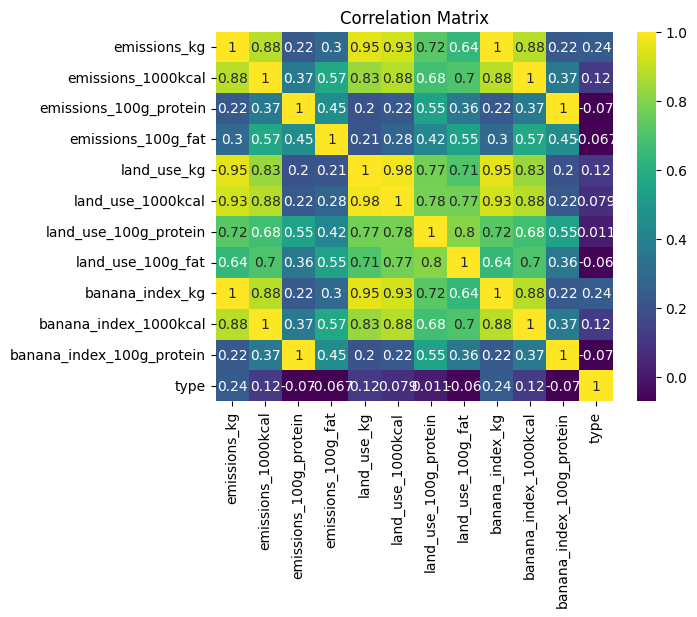

In [18]:
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            cmap='viridis',
            annot=True)

plt.title("Correlation Matrix")

# ''drop'' the type

'Banana_index'columns are just recalculated values of their 'emissions' counterparts - we drop them to simplify the process and we can always recalculate them later if we need them.

In [19]:
df.columns

Index(['emissions_kg', 'emissions_1000kcal', 'emissions_100g_protein',
       'emissions_100g_fat', 'land_use_kg', 'land_use_1000kcal',
       'land_use_100g_protein', 'land_use_100g_fat', 'banana_index_kg',
       'banana_index_1000kcal', 'banana_index_100g_protein', 'type'],
      dtype='object')

In [20]:
df.drop(labels=['banana_index_kg', 'banana_index_1000kcal', 'banana_index_100g_protein'], axis='columns', inplace=True)

df.head()

,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,type
entity,,,,,,,,,
Ale,0.488690,0.317338,0.878525,2.424209,0.811485,0.601152,1.577687,3.065766,1
Almond butter,0.387011,0.067265,0.207599,0.079103,7.683045,1.296870,3.608433,1.495297,1
Almond milk,0.655888,2.222230,13.595512,4.057470,1.370106,2.675063,12.687839,4.600530,1
Almonds,0.602368,0.105029,0.328335,0.119361,8.230927,1.423376,4.261040,1.610136,1
Apple juice,0.458378,0.955184,29.152212,19.754980,0.660629,1.382839,43.232158,26.246743,1


Text(0.5, 1.0, 'Correlation Matrix: v2')

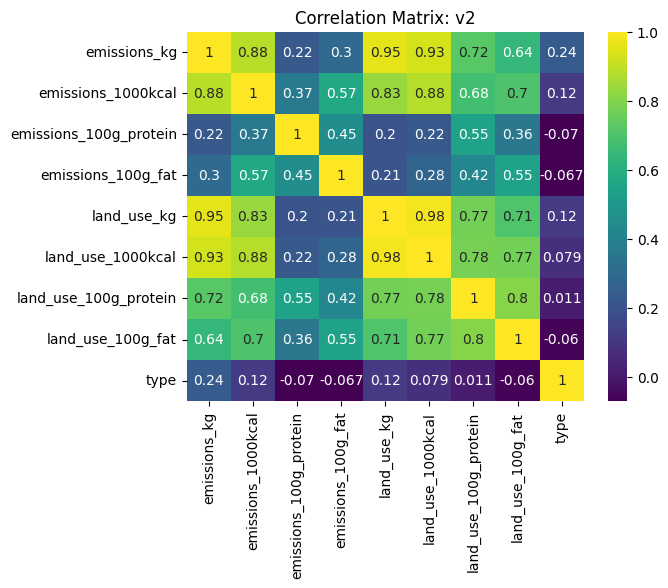

In [21]:
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            cmap='viridis',
            annot=True)

plt.title("Correlation Matrix: v2")

# ''drop'' the type here as well

## Analysis - distributions, plotting etc.

In [22]:
df.describe()

,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,type
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,6.968750,4.234650,12.344095,23.437459,13.814140,6.984234,15.143724,28.812621,1.677215
std,15.275774,8.283058,26.924422,47.489672,45.541512,22.869427,28.171820,58.270064,0.868918
min,0.207276,0.067265,0.207599,0.079103,0.395357,0.427187,0.686572,1.032875,1.000000
25%,0.952077,0.559785,2.411551,3.263673,1.774890,1.217093,4.348589,4.635697,1.000000
50%,1.972573,1.218910,5.285952,7.661961,3.437468,2.120968,7.825508,9.970706,1.000000
75%,5.300145,4.688395,10.815254,20.426275,9.089234,4.607993,13.350834,27.436151,3.000000
max,129.747715,68.095953,257.293857,348.489652,427.331126,223.690135,211.381205,478.803717,3.000000


In [23]:
df.loc['Bananas']

,Bananas
emissions_kg,0.873350
emissions_1000kcal,0.875803
emissions_100g_protein,7.721869
emissions_100g_fat,20.469220
land_use_kg,2.639824
land_use_1000kcal,2.717877
land_use_100g_protein,22.821229
land_use_100g_fat,64.907342
type,1.000000


Text(0.5, 1.0, '... - with log scale')

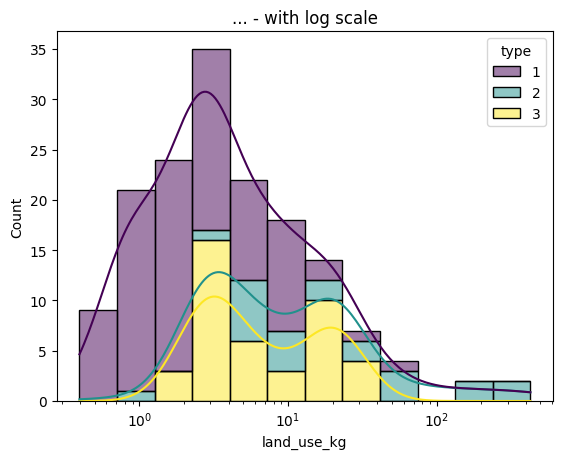

In [24]:
# distribution plots

# show example w/o log_scale to see how skewed it is with outliers
sns.histplot(df, x="land_use_kg", hue="type", kde=True, palette="viridis",
             log_scale=True,
             multiple="stack")

plt.title("... - with log scale")

# and do more or those

<Axes: ylabel='Count'>

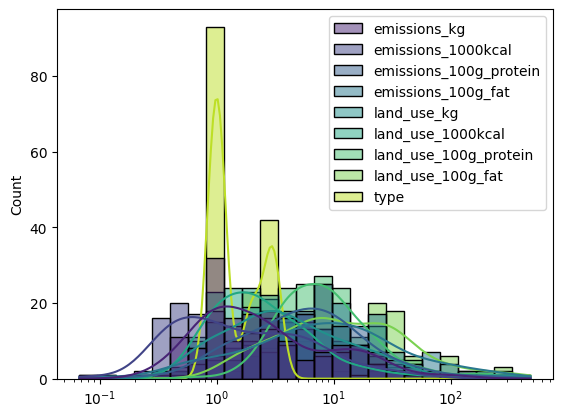

In [25]:
sns.histplot(df, kde=True, palette="viridis",
             log_scale=True)

# looks fun, but type doesnt make sense here

# should deal with outliers first

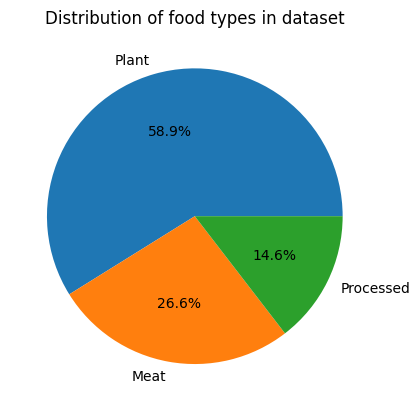

In [26]:
fig, ax = plt.subplots()

# think if I should rename values in df directly or keep them as 123

pie_label = ['Plant', 'Meat', 'Processed']

ax.pie(df['type'].value_counts(), labels=pie_label, autopct='%1.1f%%')

plt.title("Distribution of food types in dataset")

plt.show()

<Axes: >

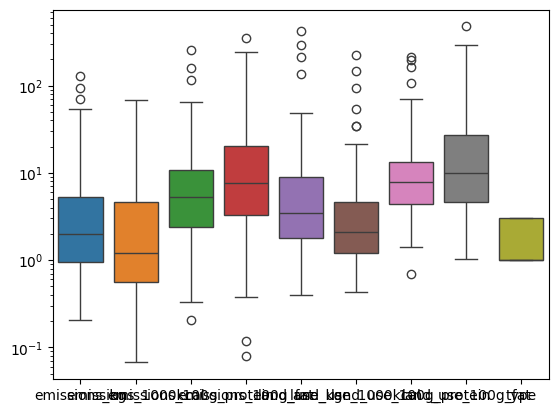

In [27]:
# nearing to outliers ...

sns.boxplot(data=df, log_scale=True)

# rotate x labels


<Axes: >

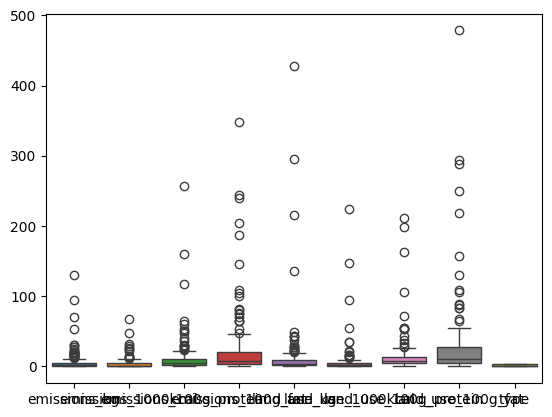

In [28]:
sns.boxplot(data=df)


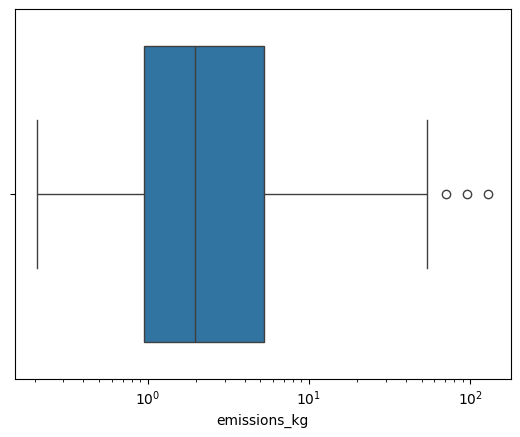

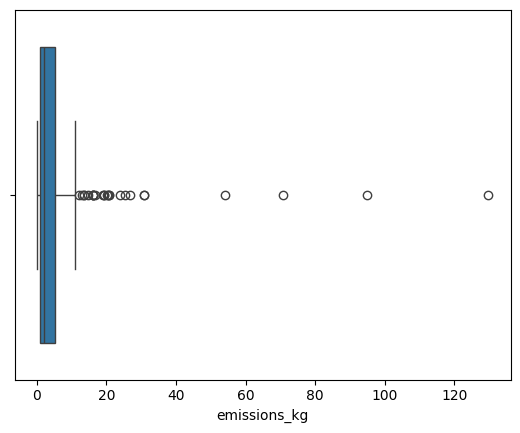

In [29]:
# think if I should use log scale for further analysis (get outliers first) (or check both options)

sns.boxplot(data=df, x = "emissions_kg", log_scale=True)

plt.show()

sns.boxplot(data=df, x = "emissions_kg", log_scale=False)

plt.show()

In [30]:
df.columns

Index(['emissions_kg', 'emissions_1000kcal', 'emissions_100g_protein',
       'emissions_100g_fat', 'land_use_kg', 'land_use_1000kcal',
       'land_use_100g_protein', 'land_use_100g_fat', 'type'],
      dtype='object')

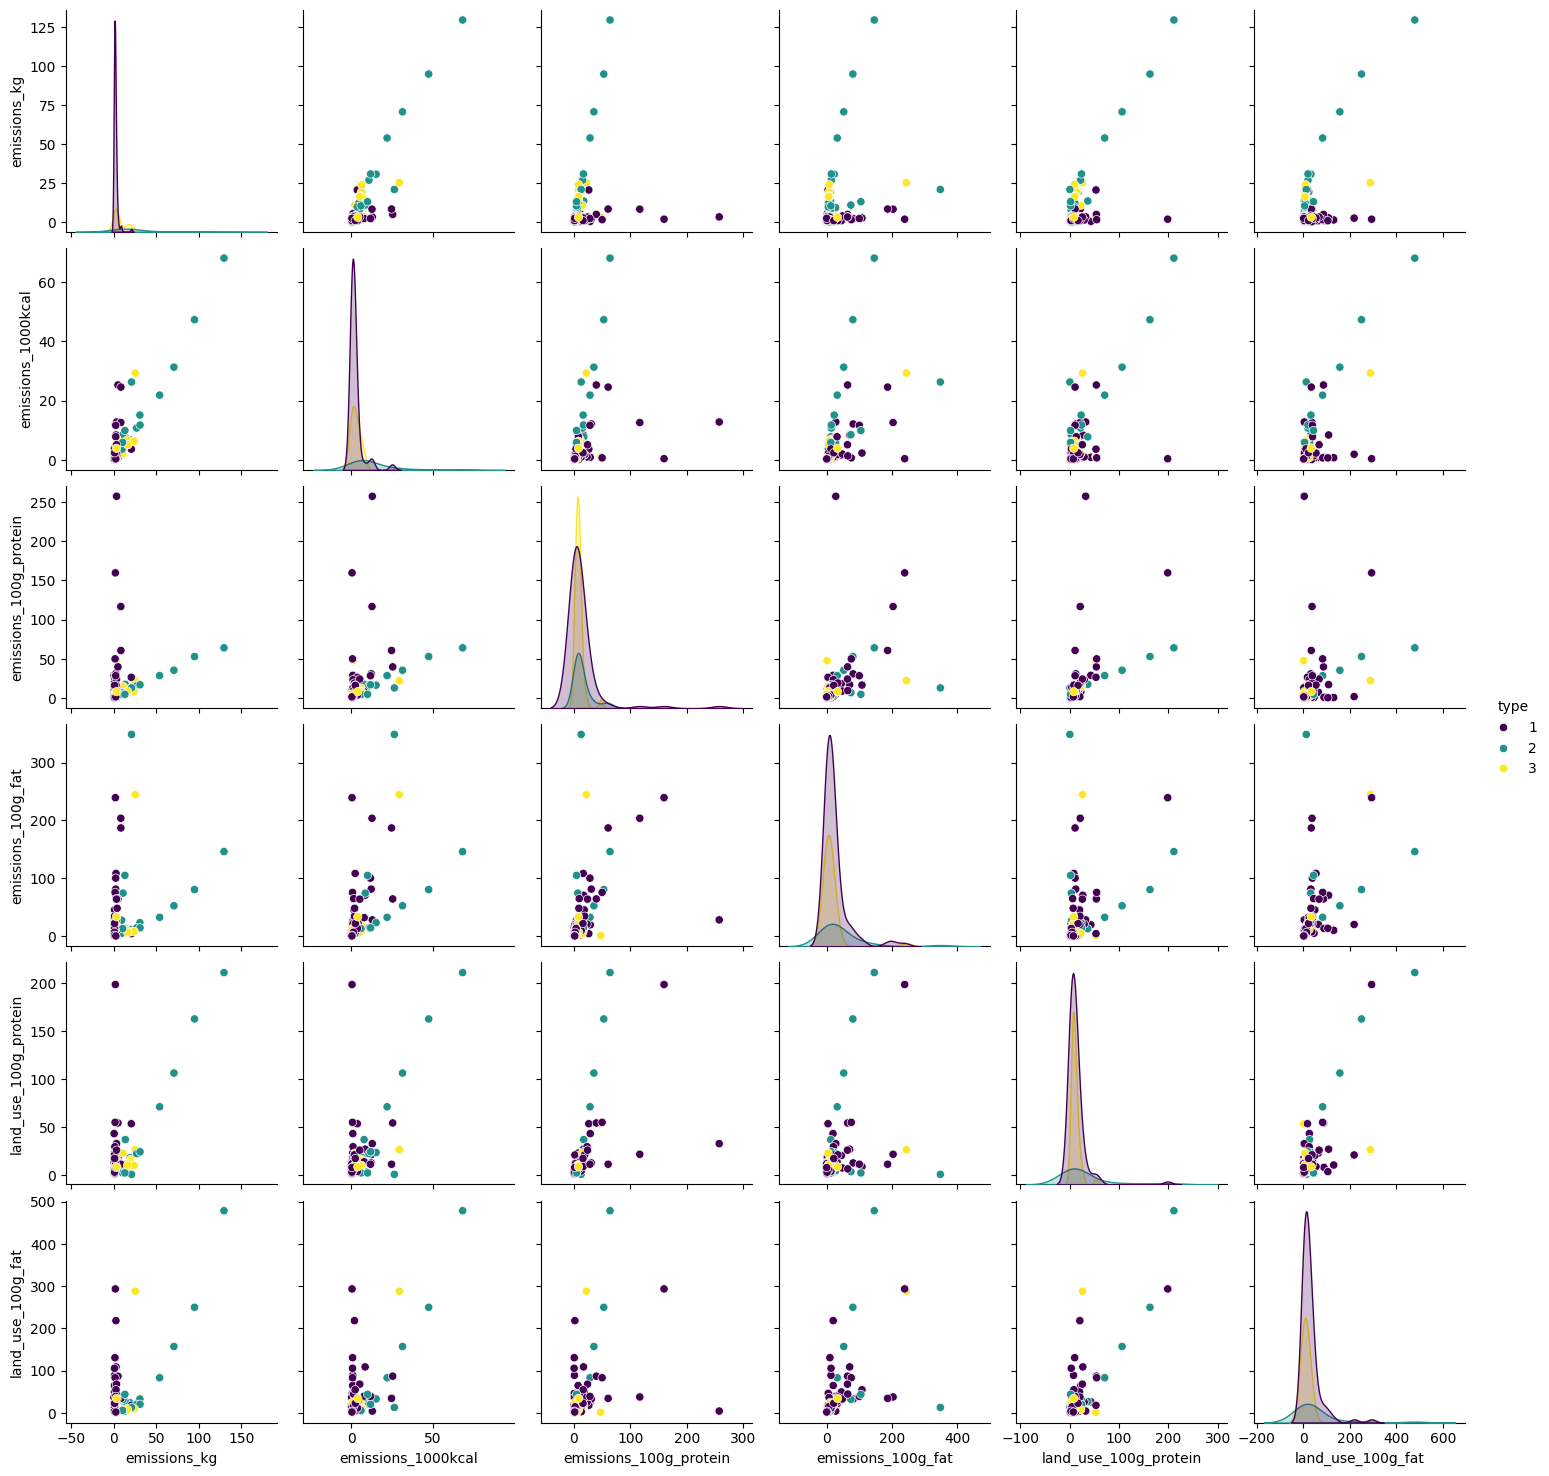

In [31]:


pairplot_cols = ['emissions_kg', 'emissions_1000kcal', 'emissions_100g_protein',
        'emissions_100g_fat', 'land_use_100g_protein', 'land_use_100g_fat', 'type']

sns.pairplot(data=df[pairplot_cols], hue='type', palette='viridis')

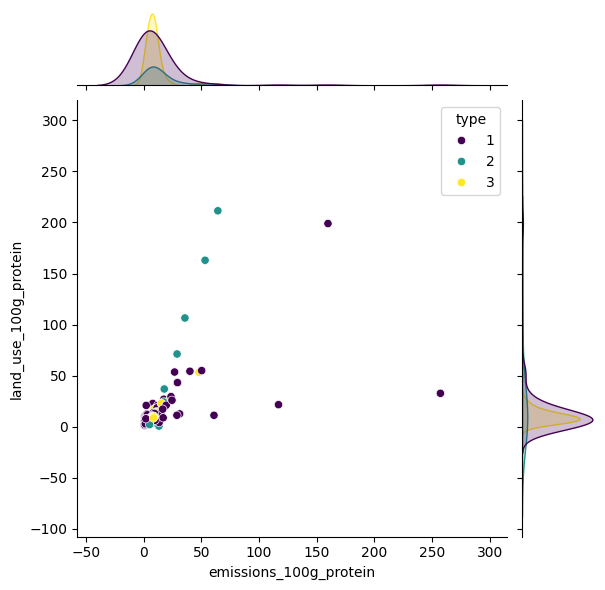

In [32]:
sns.jointplot(data=df, x='emissions_100g_protein', y='land_use_100g_protein', hue='type', palette='viridis')

## Outliers
just the start

In [33]:
# 3 sigma rule

def three_sigma(df, outlier_col, sigma_count=3, use_median=False):
  sigma = df[outlier_col].std()
  # select central tendency
  E = df[outlier_col].median() if use_median else df[outlier_col].mean()

  print(f"Outliers for {outlier_col} column: ")
  for index, row in df.iterrows():
    if abs(row[outlier_col]-E) > sigma * sigma_count:
      # outliers
      print(index)
    else:
      #typical
      pass


In [34]:
for columns in df.columns:
  three_sigma(df, columns)
  print("----")

Outliers for emissions_kg column: 
Beef burger
Beef meatballs
Beef mince
Beef steak
----
Outliers for emissions_1000kcal column: 
Beef meatballs
Beef mince
Beef steak
Cottage cheese
----
Outliers for emissions_100g_protein column: 
Coconut milk
Grapes
Sugar
----
Outliers for emissions_100g_fat column: 
Cottage cheese
Grapes
Prawns
Raspberries
Sugar
----
Outliers for land_use_kg column: 
Beef meatballs
Beef mince
Beef steak
----
Outliers for land_use_1000kcal column: 
Beef meatballs
Beef mince
Beef steak
----
Outliers for land_use_100g_protein column: 
Beef meatballs
Beef mince
Beef steak
Sugar
----
Outliers for land_use_100g_fat column: 
Beef mince
Beef steak
Cottage cheese
Lentils
Sugar
----
Outliers for type column: 
----


In [35]:
# using IQR

# add a as argument and check with sigma_count
def iqr_outliers(df, outlier_col, sigma_count=3, use_median=False):
  a = sigma_count / 1.35 # 'rule of thumb' as stated on lectures

  Q1 = df[outlier_col].quantile(0.25)
  Q2 = df[outlier_col].quantile(0.5)
  Q3 = df[outlier_col].quantile(0.75)

  IQR = Q3 - Q1

  left_limit = Q1 - a * IQR
  right_limit = Q3 + a * IQR

  outliers = []
  # print(f"Outliers for {outlier_col} column: ")
  for index, row in df.iterrows():
    if row[outlier_col] < left_limit or row[outlier_col] > right_limit:
      outliers.append(index)

  return outliers

43


<Axes: >

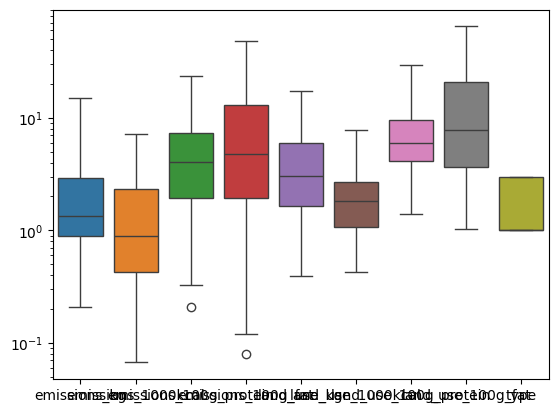

In [36]:
# testing how box plots would look w/o iqr outliers

outliers = set()

for columns in df.columns:
  outliers.update(iqr_outliers(df, columns))


print(len(outliers))
df2 = df.loc[~df.index.isin(outliers)]

sns.boxplot(data=df2, log_scale=True) # hmm

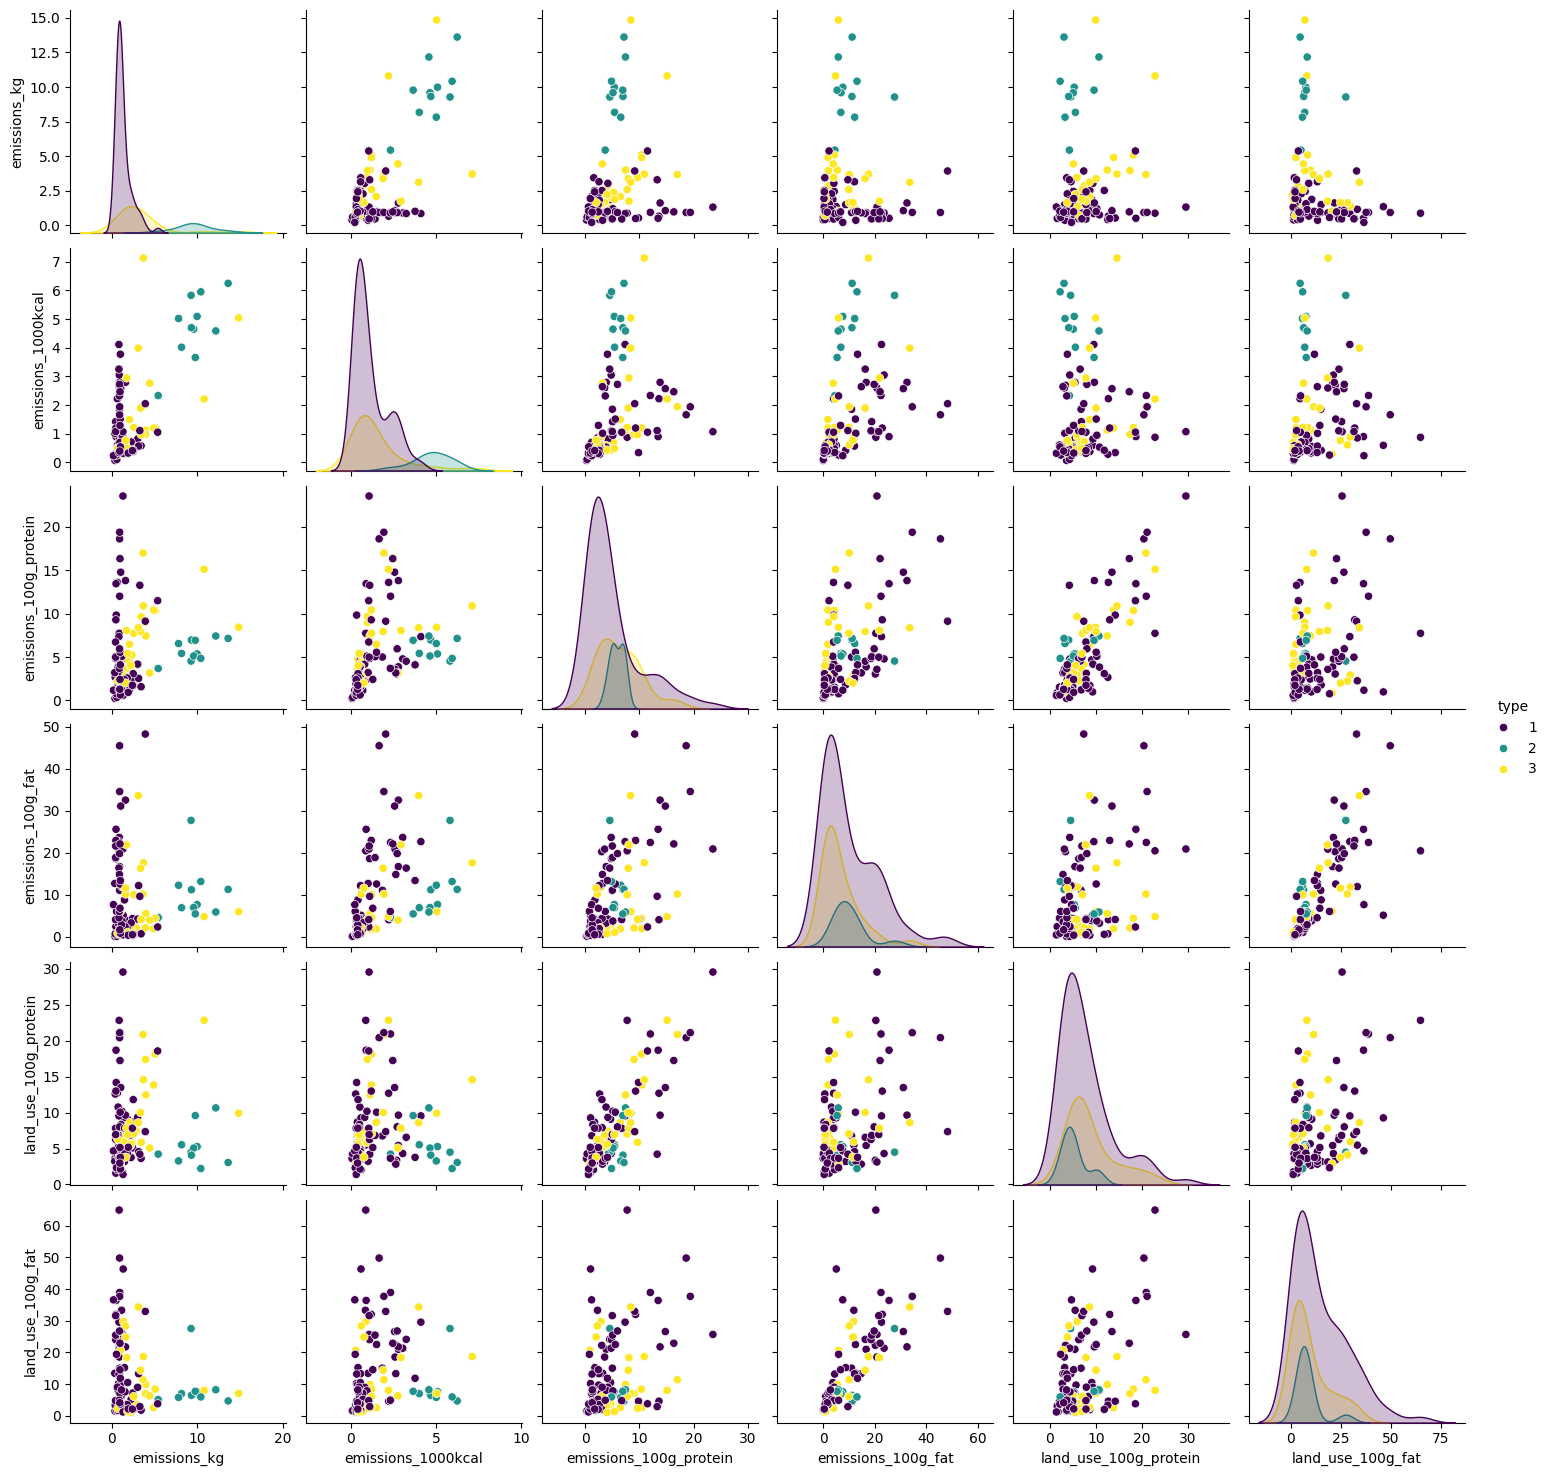

In [37]:

pairplot_cols = ['emissions_kg', 'emissions_1000kcal', 'emissions_100g_protein',
        'emissions_100g_fat', 'land_use_100g_protein', 'land_use_100g_fat', 'type']

sns.pairplot(data=df2[pairplot_cols], hue='type', palette='viridis')

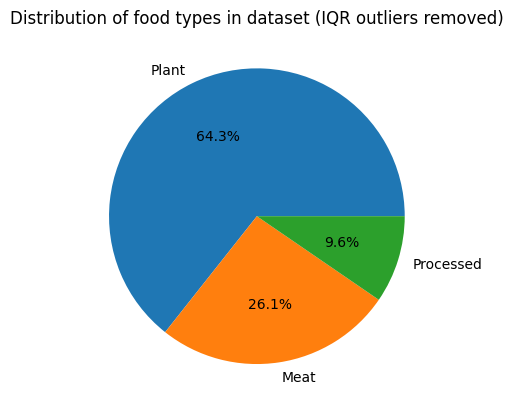

In [38]:
fig, ax = plt.subplots()

pie_label = ['Plant', 'Meat', 'Processed']

ax.pie(df2['type'].value_counts(), labels=pie_label, autopct='%1.1f%%')

plt.title("Distribution of food types in dataset (IQR outliers removed)")

plt.show()

# before and after plot?


In [39]:
df2.describe()

,emissions_kg,emissions_1000kcal,emissions_100g_protein,emissions_100g_fat,land_use_kg,land_use_1000kcal,land_use_100g_protein,land_use_100g_fat,type
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,2.586650,1.565624,5.363536,9.249623,4.460332,2.145550,7.761906,12.810125,1.617391
std,3.010099,1.560866,4.602942,9.912992,4.063547,1.435841,5.448481,12.387468,0.874418
min,0.207276,0.067265,0.207599,0.079103,0.395357,0.427187,1.395185,1.032875,1.000000
25%,0.895255,0.429679,1.939546,1.940207,1.645342,1.067734,4.098809,3.648437,1.000000
50%,1.344353,0.898188,4.083186,4.808329,3.034817,1.835972,5.939932,7.713947,1.000000
75%,2.942554,2.324844,7.373388,12.933549,5.927478,2.690540,9.559863,20.808942,3.000000
max,14.838609,7.133507,23.560167,48.276323,17.472121,7.767866,29.532767,64.907342,3.000000


In [40]:
import plotly.express as px

In [43]:
import plotly.graph_objects as go


fig = go.Figure(data=go.Scatter(x=df['emissions_100g_fat'],
                                y=df['emissions_100g_protein'],
                                mode='markers',
                                marker_color=df['type'],
                                text=df.index)) # hover text goes here

fig.update_layout(title=dict(text='Test of plotly hovers'))
fig.show()

TODOs


*   NEXT: Do a comparison with plots: exluding outliers selected by iqr, 3sr mean, 3sr median, knn and see which one seems the best
*   Prettify plots
*   Do MOAR plots
*   Read lecture notes and list the methods here, look them up and see what could be useful
*   Think about normalization
*   Radar charts? (maybe binning first?)
*   Do outliers in separate df  (or column flag? or keep original)
*   Do wordclouds for fun

